---
# K-Neighbors Regressor

---

**A regressão KNeighbors consiste em realizar previsões através da interpolação local dos dados associados aos vizinhos mais próximos no conjunto de treinamento, ou seja, dado um objeto desconhecido, procurar pelos k vizinhos mais próximos a ele em um conjunto de dados previamente conhecido, segundo uma medida de distância pré-estabelecida.**





In [31]:
# --------------------- IMPORTANDO BIBLIOTECA ----------------------
%matplotlib inline
!pip install mglearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import mglearn 
from sklearn.neighbors import KNeighborsRegressor
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Separando os dados que serão treinados e os que serão testados 

O método usado para essa separação de dados é o RANDOM_SEED

In [32]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [33]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")


In [34]:
X =  dados[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y = dados["HappinessScore"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)

---
# Aplicando a Regressão K-Neighbors

---

Nessa primeira aplicação os dados usados para prever o Happiness Score nos países, são: IDH, GPD PerCapita, Beer PerCapita, Spirit PerCapita, Wine PerCapita.

In [36]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

### Análise

Os paramêtros usados são os padrão. Então o número de vizinhos a serem usados para os calculos é 5, ou seja, o número padrão. O algoritimo "auto" que tentará decidir o algoritmo mais apropriado com base nos valores passados para o fit método. A métrica de distância utilizada é a Distância de Minkowski de ordem p, que tem a seguinte fórmula:


<img src="distancia.png" width="350">

### Previsão

Então após o treinamento, são calculados os valores previstos para os que fora deixados para teste.

In [37]:
y_predict = reg.predict(X_test)
y_predict

array([7.2824, 6.2248, 5.1072, 3.643 , 7.0554, 5.8292, 5.7534, 3.8306,
       5.4962, 6.875 , 5.7138, 3.9354, 6.348 ])

### Resultados

É feita a comparação com o que a regressão calculou e os valores reais, para ver o quanto essa regressão, dessa forma consegue prever o Happiness Score

In [38]:
erro=[]
for i,e in zip(y_predict,y_test):
    if i<e:
     diferenca= e-i
     erro.append(diferenca)
    else:
     diferenca= i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [39]:
data = {
'Y_predict': y_predict,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
tabela.head(5)

,Y_predict,Y_test,Erro,Classificação
18,7.2824,6.871,0.4114,Certo
45,6.2248,5.956,0.2688,Certo
47,5.1072,5.919,0.8118,Errado
89,3.6430,4.635,0.9920,Errado
4,7.0554,7.413,0.3576,Certo


In [40]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A regressão Kneighbors acertou {0}%".format(acertou))

A regressão Kneighbors acertou 61.53846153846154%


**Tem-se então que a Regressão K-Neighbors acertou cerca de 61.54% com a sua previsão.**

---
# Primeira iteração

---

Nessa aplicação de K-Neighbors os dados que serão usados para o calculo da Happiness Score será o IDH e a GPD PerCapita.

Portanto os mesmo passos serão seguidos, porem apenas com a influência de dois dados da base

In [41]:
X2 =  dados[['HDI', 'GDP_PerCapita']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=RANDOM_SEED)

In [42]:
reg.fit(X_train2, y_train2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [43]:
y_predict2 = reg.predict(X_test2)
y_predict2

array([7.152 , 5.4852, 6.0942, 3.643 , 7.1462, 5.1418, 5.5162, 3.8394,
       5.561 , 6.2494, 5.7628, 3.9354, 6.5374])

In [44]:
erro=[]
for i,e in zip(y_predict2,y_test2):
    if i<e:
     diferenca = e-i
     erro.append(diferenca)
    else:
     diferenca = i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [45]:
data = {
'Y_predict': y_predict,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
tabela.head(5)

,Y_predict,Y_test,Erro,Classificação
18,7.2824,6.871,0.2810,Certo
45,6.2248,5.956,0.4708,Certo
47,5.1072,5.919,0.1752,Certo
89,3.6430,4.635,0.9920,Errado
4,7.0554,7.413,0.2668,Certo


In [46]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A regressão Kneighbors acertou {0}%".format(acertou))

A regressão Kneighbors acertou 69.23076923076923%


### Conclusão

Nesse caso, a porcentagem de acerto foi de aproximadamente 69,23%, um aumento de 7,69% comparada com a primeira aplicação de K-Neighbors, dessa forma percebe-se que o IDH e o GPD PerCapita tem maior influência no Hapiness Score, pois conseguiram gerar um previsão melhor

---
# Passando log no GPD PerCapita

---

Outra tentativa de melhoria dos valores dados pela regressão é passando o log na coluna de dados de GPD PerCapita, pois percebeu-se, através da Análise Exploratória que esses dados tem um tendência a serem exponencias.

In [47]:
GPD= dados["GDP_PerCapita"]

In [48]:
dados.loc[:,"LOG_GPD"] = np.log(GPD)

In [49]:
dados.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,LOG_GPD
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,3.981157
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,4.380350
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,4.103139
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,4.261129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,3.771220


In [50]:
X3 =  dados[['HDI', 'LOG_GPD']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.1, random_state=RANDOM_SEED)

In [51]:
reg.fit(X_train3, y_train3)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [52]:
y_predict3 = reg.predict(X_test3)
y_predict3

array([6.4564, 5.4852, 6.0942, 3.8938, 7.0992, 5.1418, 5.5162, 3.8178,
       5.561 , 6.4778, 6.2158, 4.0096, 6.5374])

In [53]:
erro=[]
for i,e in zip(y_predict3,y_test3):
    if i<e:
     diferenca = e-i
     erro.append(diferenca)
    else:
     diferenca = i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [54]:
data = {
'Y_predict': y_predict,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
tabela.head(5)

,Y_predict,Y_test,Erro,Classificação
18,7.2824,6.871,0.4146,Certo
45,6.2248,5.956,0.4708,Certo
47,5.1072,5.919,0.1752,Certo
89,3.6430,4.635,0.7412,Errado
4,7.0554,7.413,0.3138,Certo


In [55]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A regressão Kneighbors acertou {0}%".format(acertou))

A regressão Kneighbors acertou 53.84615384615385%


### Análise do resultado

A porcentagem de acerto foi de 53,85%, ou seja, diminuiu, mostrando que passar o log nesses dados nessa regressão não é um boa iteração, pois a previsão fica mais incerta.

## GPD PerCapita com as demais variaveis

In [56]:
X4 =  dados[['HDI', 'LOG_GPD', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y4 = dados["HappinessScore"]

In [57]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.1, random_state=RANDOM_SEED)

In [58]:
reg.fit(X4_train, y4_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [59]:
y_predict4 = reg.predict(X4_test)
y_predict4

array([6.9122, 6.2248, 5.1072, 4.0006, 7.0554, 5.8292, 6.1482, 5.1322,
       5.4962, 6.875 , 5.7138, 3.891 , 6.348 ])

In [60]:
erro=[]
for i,e in zip(y_predict4,y4_test):
    if i<e:
     diferenca = e-i
     erro.append(diferenca)
    else:
     diferenca = i-e
     erro.append(diferenca)

classificacao=[]
for erros in erro: 
    if erros< 0.5: 
        classfi= 'Certo'
        classificacao.append(classfi)
    else:
        classfi= 'Errado'
        classificacao.append(classfi)

In [61]:
data = {
'Y_predict': y_predict,
'Y_test': y_test,
'Erro': erro, 
'Classificação': classificacao,
}
tabela = pd.DataFrame(data, columns=['Y_predict', 'Y_test','Erro','Classificação'])
tabela.head(5)

,Y_predict,Y_test,Erro,Classificação
18,7.2824,6.871,0.0412,Certo
45,6.2248,5.956,0.2688,Certo
47,5.1072,5.919,0.8118,Errado
89,3.6430,4.635,0.6344,Errado
4,7.0554,7.413,0.3576,Certo


In [62]:
contador=0
for c in classificacao: 
    if c == "Certo": 
        contador+=1
acertou=(contador/len(classificacao))*100
print("A regressão Kneighbors acertou {0}%".format(acertou))

A regressão Kneighbors acertou 46.15384615384615%


A porcentagem diminuiu ainda mais, comprovando a maior influência do IDH e do GPD PerCapita, comparado com os outros dados! E além diss, que a iteração do log não nos premite obter melhores aproximações nesse caso

ValueError: x and y must be the same size

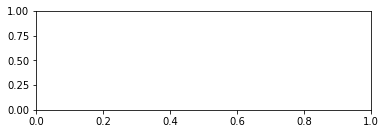

In [65]:



n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train, y_train).predict(X_test)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train, y_train, c='k', label='data')
    plt.plot(X_test, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()